# Latent Dirichlet Allocation

This is latent dirichlet allocation program. I use this program for my learning purpose.

Thanks to Alfan Farizki Wicaksono from Fasilkom, Universitas Indonesia.
Actually this is Alfan's code, so I'm just copying his code from Pusilkom UI website.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd
import gensim
import nltk

from nltk.stem.snowball import SnowballStemmer

from gensim.corpora import Dictionary, MmCorpus
from gensim.models import ldamodel

from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

Now, define function for load our dataset

In [3]:
def load_dataset(filename):
    file = open(filename, 'r')

    acc_names = []
    tweets = []

    for line in file:
        line = line.strip()
        parts = line.split('###')
        acc_names.append(parts[0])
        tweets.append(parts[1])

    return acc_names, tweets

Define number of topic

In [7]:
# config variables
num_topics=4

In [9]:
# definisikan beberapa fungsi untuk kebutuhkan pre-processing, pre-processing yang dilakukan adalah
# 1. lowercasing
# 2. stopword removal
# 3. stemming

stemmer = SnowballStemmer("english")
stopwords = nltk.corpus.stopwords.words('english')

def preprocess(text):

    # tokenizing and lowercasing
    tokens = [word.lower() for word in text.split()]
    filtered_tokens = []

    # buat yang bukan terdiri dari alfabet, dan merupakan stopword
    for token in tokens:
        if re.search('[a-zA-Z]', token) and (token not in stopwords):
            filtered_tokens.append(token)

    # lakukan stemming dengan snowball stemmer
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

Then we can import our dataset. I got the dataset from Alfan. Regarding to his statement in his website, he get the dataset from twitter.

In [10]:
# Kita load dokumen twitter, dan lakukan preprocessing terhadap tweet yang sudah di-load
acc_names, tweets = load_dataset("twitter.txt")

# Lakukan pre-process untuk setiap tweet pada koleksi "tweets" kita
# Gunakan List Comprehension untuk mempermudah hidup kita
tweets = [preprocess(tweet) for tweet in tweets]

In [11]:
tweets

[['kardashian',
  'yr',
  'anniversary,',
  'iphon',
  'yr',
  'anniversary,',
  'so,',
  'kardashian',
  'made',
  'iphon'],
 ['iphon',
  'year',
  'old.',
  'appl',
  'watch',
  'year',
  'old.',
  'feel',
  'peopl',
  'forget',
  'small',
  'fact.'],
 ["can't",
  'save',
  'make,',
  'live',
  'beyond',
  'means.',
  'ditch',
  'starbucks,',
  'eat',
  'less,',
  'need',
  'new',
  'iphone,',
  'save',
  'money!'],
 ['time', 'year!', 'iphon', 'vs.', 'samsung', 'galaxi', 's8', 'smackdown:'],
 ['sell',
  'yeezi',
  'samsung',
  'galaxi',
  's8',
  'anyon',
  'interest',
  'show',
  'proof',
  'trust',
  '@devilishrt',
  '@alienrt',
  '@bear_retweet',
  '@flyrt'],
 ['iphon',
  '16gb',
  'spacegray',
  'peso',
  'only!',
  'complet',
  'full',
  'packag',
  'guys!',
  'dm'],
 ['swear',
  'even',
  'iphon',
  'dress',
  'clown,',
  'reach',
  'pillow',
  '&choke',
  'slept,',
  'still',
  'buy',
  'samsung'],
 ['iphon',
  '8',
  'a11',
  'bionic',
  'chip',
  'lost',
  'samsung',
  'gala

Make dictionary for words in our document (in tweets variable). We will add unique words into this dictionary.

In [15]:
# membuat term dictionary dari korpus kita, dimana setiap kata unik akan diberikan sebuah index
dictionary = Dictionary(tweets)

# buang term yang:
# pop term which:
# 1. muncul di kurang dari 2 dokumen
# 1. appears in less than 2 documents 
# 2. muncul di lebih dari 0.9*(total_dok) dokumen
# 2. appears in more than  0.9*(total_doct) documents
dictionary.filter_extremes(no_below=2, no_above=0.9)

# ubah dictionary menjadi object bag-of-words reference
# ingat bahwa dalama LDA, dokumen diasumsikan dengan bag-of-words model
corpus = [dictionary.doc2bow(tweet) for tweet in tweets]

In [14]:
corpus

[[(0, 2), (1, 1)],
 [(0, 1), (2, 1), (3, 2)],
 [(4, 1)],
 [(0, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(0, 1), (9, 1), (10, 1)],
 [(0, 1), (7, 1), (11, 1), (12, 1)],
 [(0, 1), (5, 1), (7, 1), (8, 1), (13, 1), (14, 1)],
 [(5, 1), (7, 1), (10, 1), (14, 1), (15, 1), (16, 1)],
 [(5, 1), (7, 1), (9, 1)],
 [(0, 1)],
 [(0, 1)],
 [(5, 1), (7, 1), (11, 1), (12, 1), (14, 1), (17, 1), (18, 1)],
 [(1, 1), (3, 1), (5, 1), (7, 1), (14, 1)],
 [(0, 1)],
 [(5, 1), (7, 2), (14, 2)],
 [(0, 1), (5, 1), (7, 1), (19, 1)],
 [(0, 1), (4, 1)],
 [(20, 1), (21, 1)],
 [(20, 1), (21, 1), (22, 1), (23, 1)],
 [(13, 1), (20, 1), (24, 1)],
 [(25, 1), (26, 1), (27, 1)],
 [(20, 1), (21, 1), (23, 1)],
 [(20, 1), (21, 1), (26, 1)],
 [(20, 1), (28, 1)],
 [(20, 1), (21, 1), (29, 1)],
 [(20, 1), (21, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(20, 1), (21, 1), (30, 1), (31, 1)],
 [(3, 1), (18, 1), (20, 1), (21, 1)],
 [(19, 1), (20, 1), (21, 2), (33, 1), (34, 1)],
 [(20, 1), (21, 1), (22, 1), (29, 1)

LDA Rock n Roll !

In [16]:
# Run the LDA !
lda = ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=1, iterations=5000)

Now check all of toics generate by our LDA

In [18]:
# tampilkan topic matrix
topics_matrix = lda.show_topics(formatted=False)

for topic_no, topic_words in topics_matrix:

    print ('topic number: {}'.format(topic_no))

    # default: top-10 kata yang paling tinggi probabilitasnya
    for word, prob in topic_words:
        print (word, prob)

topic number: 0
referendum 0.126043
catalunya 0.0985092
iphon 0.0973845
catalan 0.0717497
spanish 0.0441879
referendum, 0.0308015
support 0.0307097
stop 0.0306677
polic 0.0306523
poll 0.0305313
topic number: 1
samsung 0.123162
galaxi 0.0765961
note 0.0759658
iphon 0.0544107
champion 0.0526344
leagu 0.03097
referendum 0.030143
year 0.0295801
get 0.0294869
play 0.0294286
topic number: 2
champion 0.118659
leagu 0.11774
samsung 0.0470953
galaxi 0.0468832
iphon 0.0336811
catalunya 0.0331714
block 0.0325166
support 0.0324582
premier 0.0323833
lost 0.0323298
topic number: 3
full 0.073688
champion 0.0574125
leagu 0.0569692
referendum 0.0402862
samsung 0.0397027
galaxi 0.0395358
note 0.0392801
got 0.0390736
atletico 0.0389037
chelsea 0.0388879


This time, we try to make cluster from topic given above. So we could know all of topics relations.

In [20]:
# bentuk terlebih dahulu vektor dokumen/tweet
# vektor tweet/dokumen = vektor probabilitas terhadap masing-masing topik
tweet_vectors = []
for tweet in tweets:
    probs = [prob for (_,prob) in lda.get_document_topics(dictionary.doc2bow(tweet))]
    tweet_vectors.append(probs)
tweet_vectors = np.array(tweet_vectors)

# kita set banyaknya cluster = banyaknya topik
num_clusters = num_topics

# gunakan algoritma K-Means, dan lakukan clustering !
km = KMeans(n_clusters=num_clusters)
km.fit(tweet_vectors)

# jika kita ingin melihat indeks cluster untuk setiap tweet/dokumen
clusters = km.labels_.tolist()

print(clusters)

[3, 0, 3, 2, 2, 1, 0, 2, 1, 1, 3, 3, 1, 0, 3, 0, 0, 3, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3]


For every cluster, sort all of index above based on their probability. 

So, it is way to find major topic form their own cluster and we will take 2 major topic for each cluster

In [21]:
# untuk setiap cluster center, kita sort argumen/index berdasarkan nilai probabilitasnya
# karena index/argumen adalah id topik.
#
# jadi, secara intuisi, ini adalah cara untuk mencari topik major yang dibicarakan di sebuah cluster
# nantinya, wakil kata cluster akan diambil dari 2 topik major di setiap cluster
#
# ::-1 artinya reverse list

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

cluster_names = {}
for i in range(num_clusters):
    print ("cluster %d words:" % i)
    
    # ambil 2 topik major untuk setiap cluster
    topic_words = []
    for ind in order_centroids[i, :1]:
        topic_words += [dictionary.get(word_id) for (word_id, prob) in lda.get_topic_terms(ind, topn=2)]
    
    cluster_names[i] = ','.join(topic_words)

    print (cluster_names[i])

cluster 0 words:
samsung,galaxi
cluster 1 words:
full,champion
cluster 2 words:
champion,leagu
cluster 3 words:
referendum,catalunya


Use matplotlib to visualize the clusters

In [22]:
### plot ke 2D ###

#reduksi dimensi dengan multidimensional scaling
mds = MDS(n_components=2)
pos = mds.fit_transform(tweet_vectors)  # shape (n_components, n_samples)

#pca = PCA(n_components=2)
#pos = pca.fit_transform(tweet_vectors)  # shape (n_components, n_samples)

# ambil hasil reduksi ke 2D untuk posisi x dan y --> agar bisa di-plot di bidang kartesius
xs, ys = pos[:, 0], pos[:, 1]

In [23]:
# fungsi yang digunakan untuk plot cluster dokumen berdsarkan distribusi topik yang dimilikinya
# xs adalah posisi axis dari semua dokumen (numpy list of real number)
# ys adalah posisi ordinat dari semua dokumen (numpy list of real number)
# clusters adalah list dari cluster index untuk masing-masing dokumen
# acc_names adalah list dari nama-nama dokumen (dalam hal ini, nama-nama akun tweet)
def plot_doc_cluster(xs, ys, clusters, acc_names):
    # warna cluster - maksimal 5 cluster
    cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

    # gunakan Pandas untuk kemudahan proses data, terutama untuk grouping
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, acc_names=acc_names))
    groups = df.groupby('label') #group by cluster!!!

    fig, ax = plt.subplots(figsize=(17, 9)) # set size
    ax.margins(0.05)

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')
        ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')

    ax.legend(numpoints=1)  #show legend with only 1 point

    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['acc_names'], size=8)

    plt.show()

# fungsi yang digunakan untuk plot distribusi kata per-topik yang ditemukan
def plot_word_dist_per_topic(topic_no, topics_matrix, width=0.5):
    _, topic_words = topics_matrix[topic_no]

    # hanya top-10 yang paling tinggi probabilitasnya
    words = []
    probs = []
    for word, prob in topic_words:
        words.append(word)
        probs.append(prob)

    ind = np.arange(len(words))

    plt.bar(ind, probs, width=width)
    plt.xticks(ind + width/2, words, rotation='vertical')
    plt.title('Word Distribution of Topic {}'.format(topic_no))
    plt.show()

This is it!

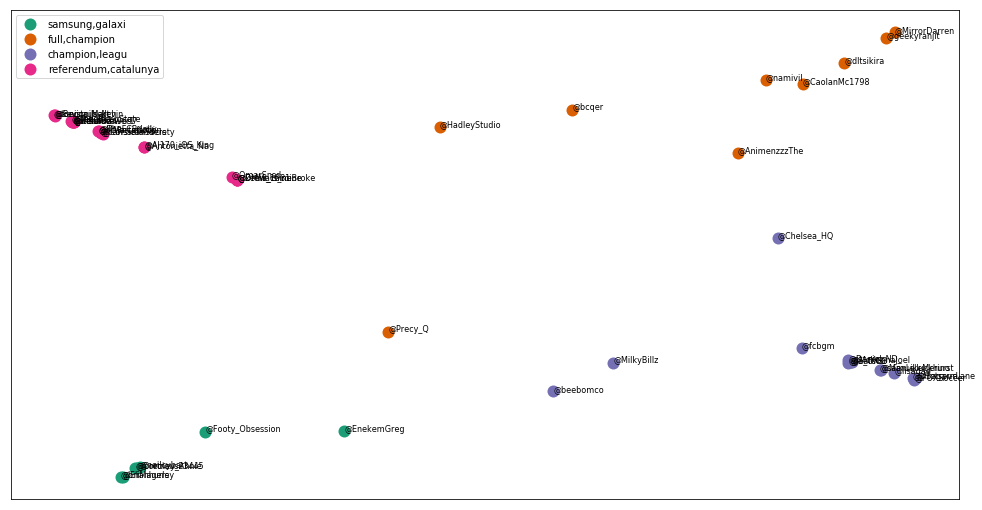

In [24]:
# plot cluster dokumen/tweet
plot_doc_cluster(xs, ys, clusters, acc_names)

There'se so many words in one cluster, I can't read it. 

How we do know? 

Don't worry, below is how we could know top 10 topic for each cluster

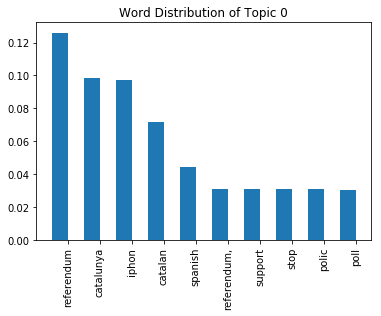

In [27]:
# plot word distribution untuk topic 0
# plot word distribution for topic 10
plot_word_dist_per_topic(0, topics_matrix)

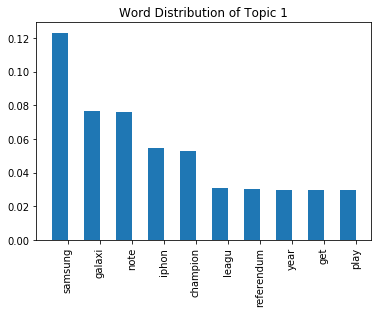

In [26]:
# plot word distribution untuk topic 1
# plot word distribution for topic
plot_word_dist_per_topic(1, topics_matrix)